## Veriseti Okuma

In [2]:
import pandas as pd
depresyon = pd.read_csv("depresyon.csv")
depresyon.head()

,text,labels
0,Umarım yakında böyle bir şeye katılabilirim.,Normal
1,"Bunlar yararlı ipuçları, paylaşım için teşekkü...",Normal
2,- Anlamıyorum.,Normal
3,"Korkutucu düşüncelerle boğuşmak, her şeyin üze...",Depression
4,"Kendimi burada hissetmiyorum, sanki etrafımdak...",Depression


In [3]:
anksiyete = pd.read_csv("anksiyete.csv")
anksiyete.head()

,text,labels
0,En önemli kısmı nedir?,Normal
1,Beyaz gömlek iyi mi?,Normal
2,Rahatsızlık için özür dilerim.,Normal
3,Bu doğru. Çeşitlilik bizi kutunun dışında düşü...,Normal
4,"Aklında bir şey var gibi görünüyor, bana söz v...",Normal


## Veriseti inceleme

In [8]:
depresyon.shape

(57597, 2)

In [9]:
anksiyete.shape

(43374, 2)

In [13]:
depresyon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57597 entries, 0 to 57596
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    57587 non-null  object
 1   labels  57597 non-null  object
dtypes: object(2)
memory usage: 900.1+ KB


In [15]:
import matplotlib.pyplot as plt

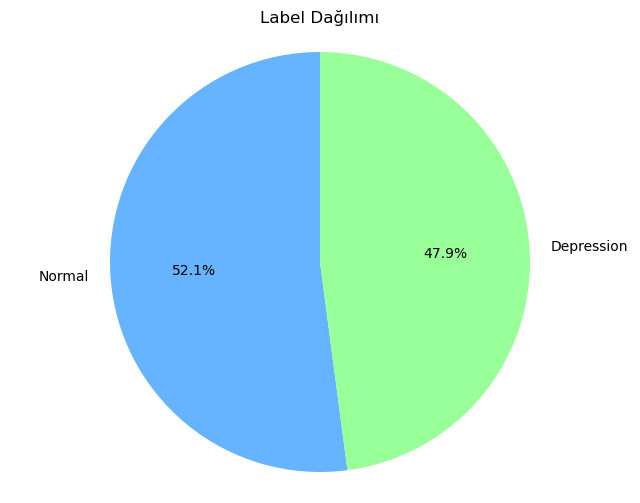

In [16]:
# 'label' kolonundaki dağılımı kontrol etme
label_counts = depresyon['labels'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99', '#ffcc99', '#ff6666', '#ffb3e6', '#c2c2f0', '#ffcc00', '#ff6666'])
plt.title('Label Dağılımı')
plt.axis('equal')  # Eşit orantılı grafik
plt.show()

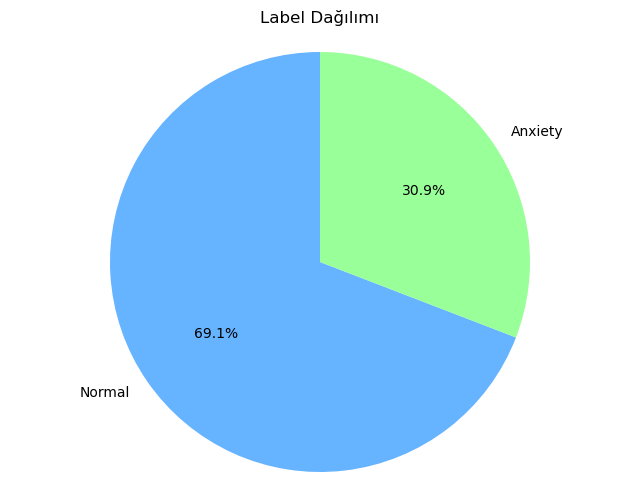

In [17]:
# 'label' kolonundaki dağılımı kontrol etme
label_counts = anksiyete['labels'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99', '#ffcc99', '#ff6666', '#ffb3e6', '#c2c2f0', '#ffcc00', '#ff6666'])
plt.title('Label Dağılımı')
plt.axis('equal')  # Eşit orantılı grafik
plt.show()

In [18]:
ank_dep = pd.concat([anksiyete, depresyon], ignore_index=True)
ank_dep.head()

,text,labels
0,En önemli kısmı nedir?,Normal
1,Beyaz gömlek iyi mi?,Normal
2,Rahatsızlık için özür dilerim.,Normal
3,Bu doğru. Çeşitlilik bizi kutunun dışında düşü...,Normal
4,"Aklında bir şey var gibi görünüyor, bana söz v...",Normal


In [19]:
ank_dep.shape

(100971, 2)

In [20]:
ank_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100971 entries, 0 to 100970
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    100961 non-null  object
 1   labels  100971 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


### Veri Dağılımını Görme

Etiketlerin Dağılımı:
labels
Normal        59993
Depression    27597
Anxiety       13381
Name: count, dtype: int64


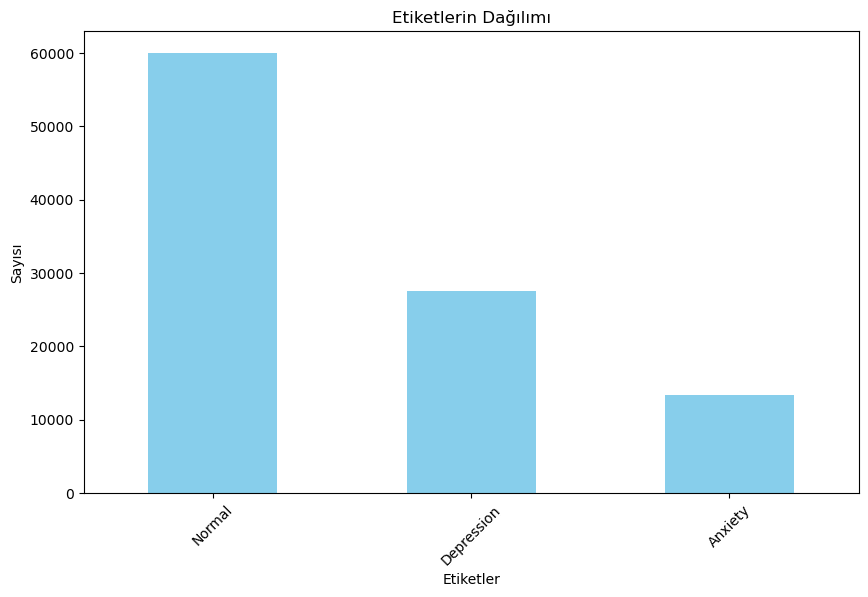

In [22]:
# 'label' sütunundaki etiketlerin sayısını alma
label_counts = ank_dep['labels'].value_counts()

# Etiketlerin dağılımını yazdırma
print("Etiketlerin Dağılımı:")
print(label_counts)

# Dağılımı görselleştirme (Bar chart)
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Etiketlerin Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Sayısı')
plt.xticks(rotation=45)
plt.show()

# Veri Temizliği ve Ön İşleme

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import random
import string
import re
import nltk

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # For multilingual support if needed

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...


In [29]:
ank_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100971 entries, 0 to 100970
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    100961 non-null  object
 1   labels  100971 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


## Eksik verilerin temizlenmesi

In [30]:
# Eksik verileri kontrol edin
print(ank_dep.isnull().sum())

# Eksik verileri kaldırmak ya da doldurmak için:
ank_dep = ank_dep.dropna()  # Eksik verileri kaldırma (isteğe bağlı)


text      10
labels     0
dtype: int64


In [31]:
# Eksik verileri kaldırma
ank_dep = ank_dep.dropna()

# Eksik veri sonrası kontrol
print(ank_dep.isnull().sum())

text      0
labels    0
dtype: int64


## Emojileri Temizleme

In [34]:
import re

def clean_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F700-\U0001F77F"  # Alchemical Symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols & Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub('', text)


## Regex ile Temizlik (Hashtag, E-posta, Link, Alıntılar)


In [35]:
def regex_processes(text):
    # Hashtagleri temizle
    text = re.sub(r'#\w+', '', text)

    # Alıntıları temizle (Çift tırnak içindeki metin)
    text = re.sub(r'"[^"]*"', '', text)
    
    # E-posta adreslerini temizle
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

    # Linkleri (URL'leri) temizle
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Yeni satır karakterlerini temizle
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('/n', ' ').replace('/r', ' ').replace('/t', ' ')

    return text


## Noktalama İşaretlerini Temizleme

In [36]:
import string

def clean_puncts(text):
    # Noktalama işaretlerini temizle
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)


## Stopwords (Durum Kelimeleri) Temizliği

In [61]:
import nltk
from nltk.corpus import stopwords

# nltk kütüphanesinin indirilen verileri (stopwords vb.) indir
nltk.download('stopwords')

# Türkçe stopwords listesi
def get_turkish_stopwords():
    stop_words = set(stopwords.words('turkish'))
    return stop_words

# Türkçe metin üzerinden stopword'leri temizleme fonksiyonu
def remove_stopwords(text):
    # Stopwords listesi al
    stop_words = get_turkish_stopwords()

    # Metni kelimelere ayır
    words = text.split()

    # Stopword'leri temizle
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Temizlenmiş kelimeler listesini döndür
    return filtered_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\busra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Lemmatizasyon (Kök Hali)

In [62]:
from nltk.stem import WordNetLemmatizer

# Türkçe metin için lemmatizasyon
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    tokens = word_tokenize(text)
    return [wordnet_lemmatizer.lemmatize(word) for word in tokens]  # Kelimeleri kök haline getir

## Genel Metin Temizleme

In [63]:
def clean_text(text):
    # Emojileri temizle
    text = clean_emojis(text)

    # Regex işlemleri (hashtag, e-posta, link vb.)
    text = regex_processes(text)

    # Noktalama işaretlerini temizle
    text = clean_puncts(text)

    # Stopwords temizliği
    filtered_words = remove_stopwords(text)

    # Lemmatizasyon
    lemmatized_tokens = lemmatize(' '.join(filtered_words))

    # Temizlenmiş metni döndür
    return ' '.join(lemmatized_tokens)


In [64]:
# Ank_dep veri setindeki text sütununa temizlik işlemi uygula
ank_dep['cleaned_text'] = ank_dep['text'].apply(clean_text)
ank_dep.head()

,text,labels,cleaned_text
0,En önemli kısmı nedir?,Normal,önemli kısmı nedir
1,Beyaz gömlek iyi mi?,Normal,Beyaz gömlek iyi mi
2,Rahatsızlık için özür dilerim.,Normal,Rahatsızlık özür dilerim
3,Bu doğru. Çeşitlilik bizi kutunun dışında düşü...,Normal,doğru Çeşitlilik bizi kutunun dışında düşünmey...
4,"Aklında bir şey var gibi görünüyor, bana söz v...",Normal,Aklında bir var görünüyor bana söz ver hemen d...


In [65]:
#tekrardan boş verinin olup olmadığına bakalım
# Eksik verileri kontrol edin
print(ank_dep.isnull().sum())

text            0
labels          0
cleaned_text    0
dtype: int64


In [70]:
# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    words = word_tokenize(text)
    # Convert to lowercase
    # words = [zeyrek.lemmatize(word.lower())[0][1][0] for word in words]

    words = [word.lower() for word in words]
    # Remove stopwords
    stop_words = set(stopwords.words('turkish'))
    words = [word for word in words if word not in stop_words]
    return words

In [72]:
from collections import Counter

In [73]:
all_words = []
for text in tqdm(ank_dep['cleaned_text']):
    words = preprocess_text(text)
    all_words.extend(words)

word_freq = Counter(all_words)
most_common_word = word_freq.most_common(200)

print("Most repetitive word:", most_common_word)
print("Frequency:", most_common_word)


100%|████████████████████████████████████████████████████████████████████████| 100961/100961 [01:01<00:00, 1640.00it/s]


Most repetitive word: [('bir', 48416), ('var', 9279), ('beni', 8674), ('hissediyorum', 7857), ('kendimi', 7403), ('kadar', 6610), ('ben', 5818), ('zaman', 5765), ('sadece', 5757), ('iyi', 5713), ('olarak', 5023), ('gerçekten', 4969), ('evet', 4585), ('bana', 4326), ('sonra', 4248), ('kötü', 4208), ('benim', 4006), ('bile', 3493), ('değil', 3457), ('olduğunu', 3447), ('mi', 3309), ('kesinlikle', 3288), ('bunu', 3128), ('sürekli', 3070), ('gün', 3058), ('fazla', 3043), ('önce', 2897), ('hiçbir', 2854), ('istiyorum', 2789), ('yok', 2756), ('panik', 2714), ('geliyor', 2650), ('ediyorum', 2628), ('merhaba', 2596), ('zor', 2565), ('aynı', 2559), ('harika', 2492), ('son', 2435), ('yardımcı', 2213), ('büyük', 2198), ('başka', 2194), ('biraz', 2170), ('şekilde', 2170), ('şimdi', 2158), ('olan', 2141), ('ancak', 2042), ('oldu', 1932), ('artık', 1872), ('ederim', 1868), ('yeni', 1828), ('olmak', 1821), ('sosyal', 1809), ('etmek', 1732), ('yüzden', 1727), ('hala', 1702), ('oluyor', 1694), ('teşekk

In [74]:
most_common_word

[('bir', 48416),
 ('var', 9279),
 ('beni', 8674),
 ('hissediyorum', 7857),
 ('kendimi', 7403),
 ('kadar', 6610),
 ('ben', 5818),
 ('zaman', 5765),
 ('sadece', 5757),
 ('iyi', 5713),
 ('olarak', 5023),
 ('gerçekten', 4969),
 ('evet', 4585),
 ('bana', 4326),
 ('sonra', 4248),
 ('kötü', 4208),
 ('benim', 4006),
 ('bile', 3493),
 ('değil', 3457),
 ('olduğunu', 3447),
 ('mi', 3309),
 ('kesinlikle', 3288),
 ('bunu', 3128),
 ('sürekli', 3070),
 ('gün', 3058),
 ('fazla', 3043),
 ('önce', 2897),
 ('hiçbir', 2854),
 ('istiyorum', 2789),
 ('yok', 2756),
 ('panik', 2714),
 ('geliyor', 2650),
 ('ediyorum', 2628),
 ('merhaba', 2596),
 ('zor', 2565),
 ('aynı', 2559),
 ('harika', 2492),
 ('son', 2435),
 ('yardımcı', 2213),
 ('büyük', 2198),
 ('başka', 2194),
 ('biraz', 2170),
 ('şekilde', 2170),
 ('şimdi', 2158),
 ('olan', 2141),
 ('ancak', 2042),
 ('oldu', 1932),
 ('artık', 1872),
 ('ederim', 1868),
 ('yeni', 1828),
 ('olmak', 1821),
 ('sosyal', 1809),
 ('etmek', 1732),
 ('yüzden', 1727),
 ('hala', 1

#  Veri Keşfi ve Analizi

## Etiket Dağılımı Analizi

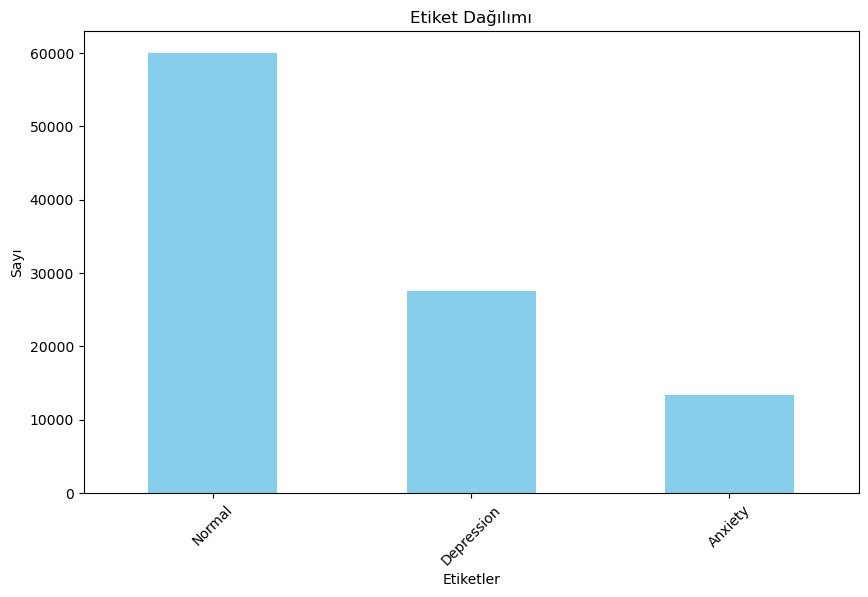

In [66]:

# Etiketlerin dağılımını görselleştirelim
plt.figure(figsize=(10,6))
ank_dep['labels'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Etiket Dağılımı')
plt.xlabel('Etiketler')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()

## Kelime Bulutları (Word Cloud)

In [53]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 487.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/301.2 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


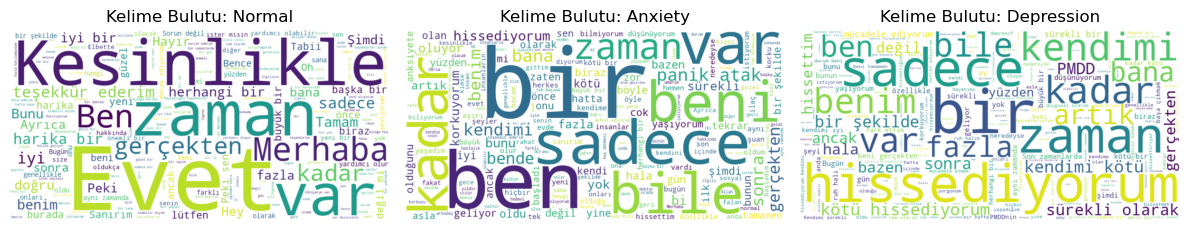

In [76]:
from wordcloud import WordCloud

# Her etikete göre kelime bulutları oluştur
labels = ank_dep['labels'].unique()

plt.figure(figsize=(12, 10))

for i, label in enumerate(labels, 1):
    plt.subplot(2, 3, i)  # 2 satır, 3 sütunlu bir grid
    subset = ank_dep[ank_dep['labels'] == label]['cleaned_text']
    text = ' '.join(subset)  # Metinleri birleştir
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Kelime Bulutu: {label}')

plt.tight_layout()
plt.show()


## Anahtar Kelime Tespiti

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştiriciyi başlat
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)

# Her etiket için anahtar kelimeleri belirleyelim
for label in labels:
    subset = ank_dep[ank_dep['labels'] == label]['cleaned_text']
    X = vectorizer.fit_transform(subset)
    
    # Anahtar kelimeleri yazdıralım
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = X.sum(axis=0).A1  # TF-IDF skorlarını al
    word_scores = dict(zip(feature_names, tfidf_scores))
    
    print(f'\nAnahtar Kelimeler - {label}:')
    sorted_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:  # En yüksek 10 kelimeyi yazdır
        print(f'{word}: {score:.4f}')


Anahtar Kelimeler - Normal:
bir: 14072.3848
var: 3818.1336
evet: 3595.5885
kesinlikle: 2484.8337
iyi: 2216.8919
mi: 2149.3554
zaman: 2031.3790
merhaba: 1978.0649
harika: 1883.1514
ben: 1824.1111

Anahtar Kelimeler - Anxiety:
bir: 4031.5048
var: 1477.1297
ben: 1365.0778
panik: 1306.9268
beni: 1087.5579
kadar: 1084.6002
bende: 989.0226
sadece: 983.6398
bile: 901.5986
sonra: 826.3770

Anahtar Kelimeler - Depression:
bir: 7236.4035
beni: 3782.5741
hissediyorum: 3564.8727
kendimi: 3427.1051
kötü: 1678.2804
kadar: 1619.5525
sadece: 1516.6876
olarak: 1415.1430
sürekli: 1395.8579
hiçbir: 1392.4238


## Temizlenmiş Verileri csv olarak Kaydetme

In [84]:
# CSV olarak kaydetme
ank_dep.to_csv("temizlenmis_ank_dep_veriseti.csv", index=False)

print("Veri başarıyla 'temizlenmis_ank_dep_veriseti.csv' dosyasına kaydedildi.")

Veri başarıyla 'temizlenmis_ank_dep_veriseti.csv' dosyasına kaydedildi.
